In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data= pd.read_csv('train_data_iitm.csv')   
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,2.0,2020-06-10 13:36:49,2020-06-10 13:51:08,1.0,2.73,1.0,N,224,148,2.0,12.00,2.5
1,NaN,2020-06-13 06:19:00,2020-06-13 06:37:00,NaN,11.58,NaN,NaN,56,42,NaN,28.81,0.0
2,2.0,2020-06-20 07:59:23,2020-06-20 08:05:39,1.0,2.05,1.0,N,79,68,2.0,8.00,2.5
3,1.0,2020-06-27 15:11:32,2020-06-27 15:15:02,1.0,1.40,1.0,N,236,75,1.0,6.00,2.5
4,1.0,2020-06-26 16:00:36,2020-06-26 16:02:28,1.0,0.60,1.0,N,186,90,2.0,4.00,2.5


In [3]:
train_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
count,54365.000000,54365.000000,60000.000000,54365.000000,60000.000000,60000.000000,54365.000000,60000.000000,60000.000000
mean,1.597554,1.353702,3.368568,1.047383,157.733683,153.572183,1.373604,13.626738,1.965417
std,0.490395,1.012809,4.323149,1.078021,69.510520,73.940982,0.532802,13.454365,1.048347
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-149.000000,-2.500000
25%,1.000000,1.000000,1.010000,1.000000,107.000000,87.000000,1.000000,6.000000,2.500000
50%,2.000000,1.000000,1.850000,1.000000,151.000000,151.000000,1.000000,9.000000,2.500000
75%,2.000000,1.000000,3.670000,1.000000,234.000000,233.000000,2.000000,15.500000,2.500000
max,2.000000,6.000000,114.300000,99.000000,265.000000,265.000000,5.000000,400.000000,2.500000


In [23]:
train_data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
congestion_surcharge     0
dayofweek                0
month                    0
hour                     0
pickup_minute            0
drop_minute              0
dtype: int64

We can see that 10% of the data contains null values on VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type

In [5]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

In [6]:
drop_i = train_data[train_data.fare_amount <0].index     #removing all fare amounts less than 0
train_data = train_data.drop(drop_i)

drop_i = train_data[train_data.trip_distance <0].index                      #removing all trip distance less than 0
train_data = train_data.drop(drop_i)

drop_i = train_data[train_data.congestion_surcharge <0].index               #removing all congestion_surcharge less than 0
train_data = train_data.drop(drop_i)

drop_i = train_data[train_data.payment_type > 6].index                      #Since payment type can take only values between 1 and 6 we remove values greater than 6
train_data = train_data.drop(drop_i) 

drop_i = train_data[train_data.RatecodeID > 6].index                      #Since RatecodeID can take only values between 1 and 6 we remove values greater than 6
train_data = train_data.drop(drop_i) 

In [7]:
def time_features_pickup(df,time_col):                                  
    df[time_col] = pd.to_datetime(df[time_col])
    df['dayofweek'] = pd.to_datetime(df[time_col]).dt.dayofweek
    df['month'] = pd.to_datetime(df[time_col]).dt.month
    df['hour'] = pd.to_datetime(df[time_col]).dt.hour
    df['pickup_minute'] = pd.to_datetime(df[time_col]).dt.minute
    return df

def time_features_drop(df,time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df['drop_minute'] = pd.to_datetime(df[time_col]).dt.minute
    return df
    

In [8]:
train_data = time_features_pickup(train_data,'tpep_pickup_datetime')
train_data = time_features_drop(train_data,'tpep_dropoff_datetime')

<AxesSubplot: xlabel='fare_amount', ylabel='Count'>

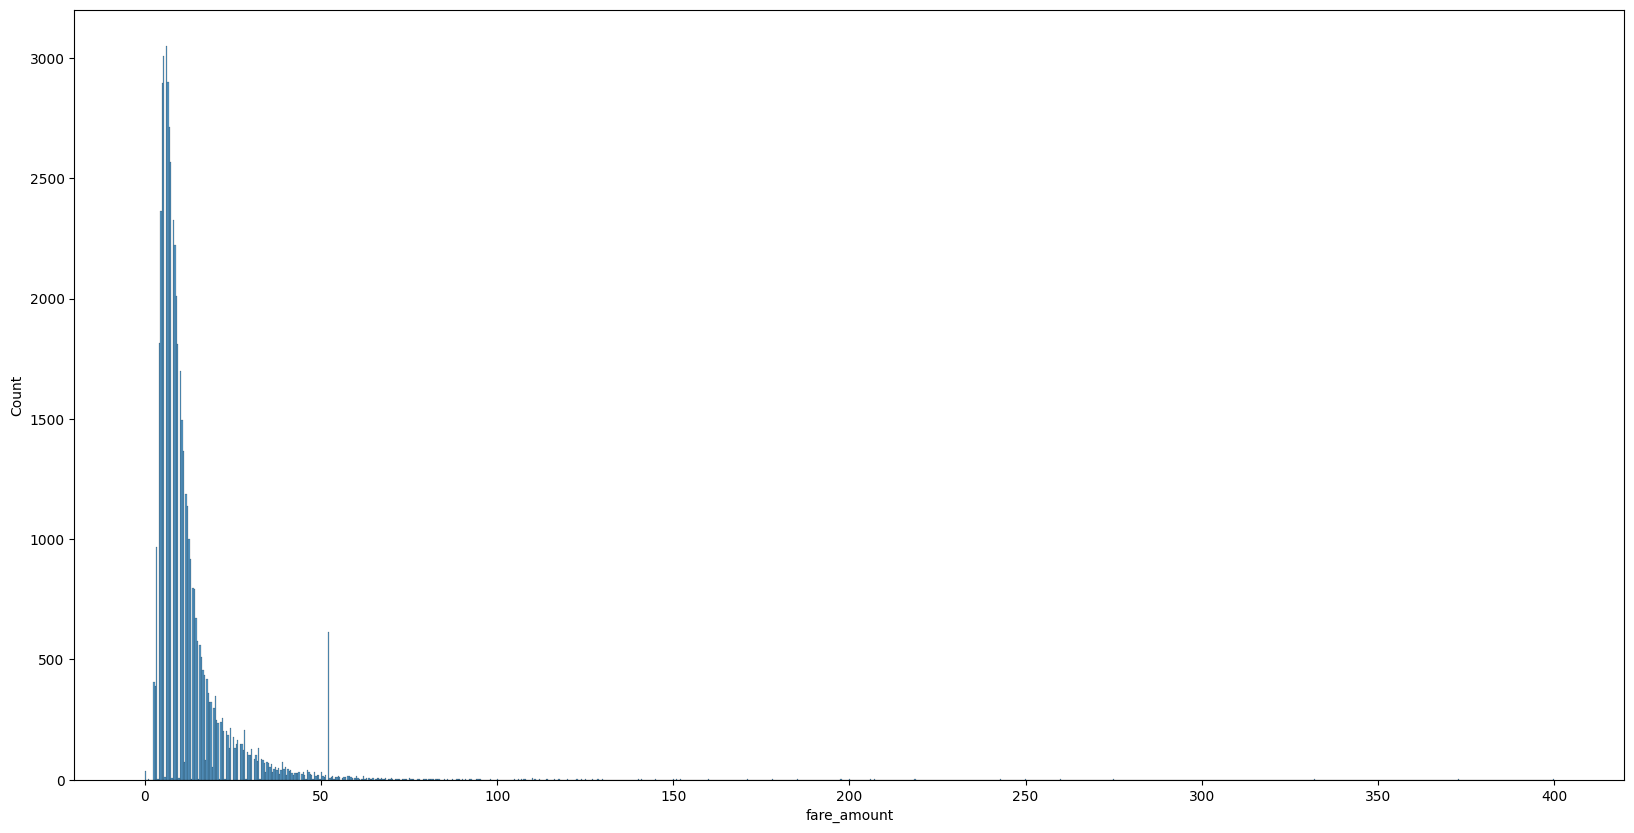

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sb.histplot(train_data.fare_amount)            #plotting the fare amount

We observe a normal distribution curve with mean of 11.6

In [10]:
train_data.fare_amount.mean()

11.968733655144352

In [11]:
train_data['fare_amount'].mean() + 5* train_data['fare_amount'].std()

67.67372443195529

In [12]:
drop_i = train_data[train_data.fare_amount > 60].index              #neglecting all values greater than mean +5*std
train_data = train_data.drop(drop_i)

<AxesSubplot: xlabel='trip_distance', ylabel='Count'>

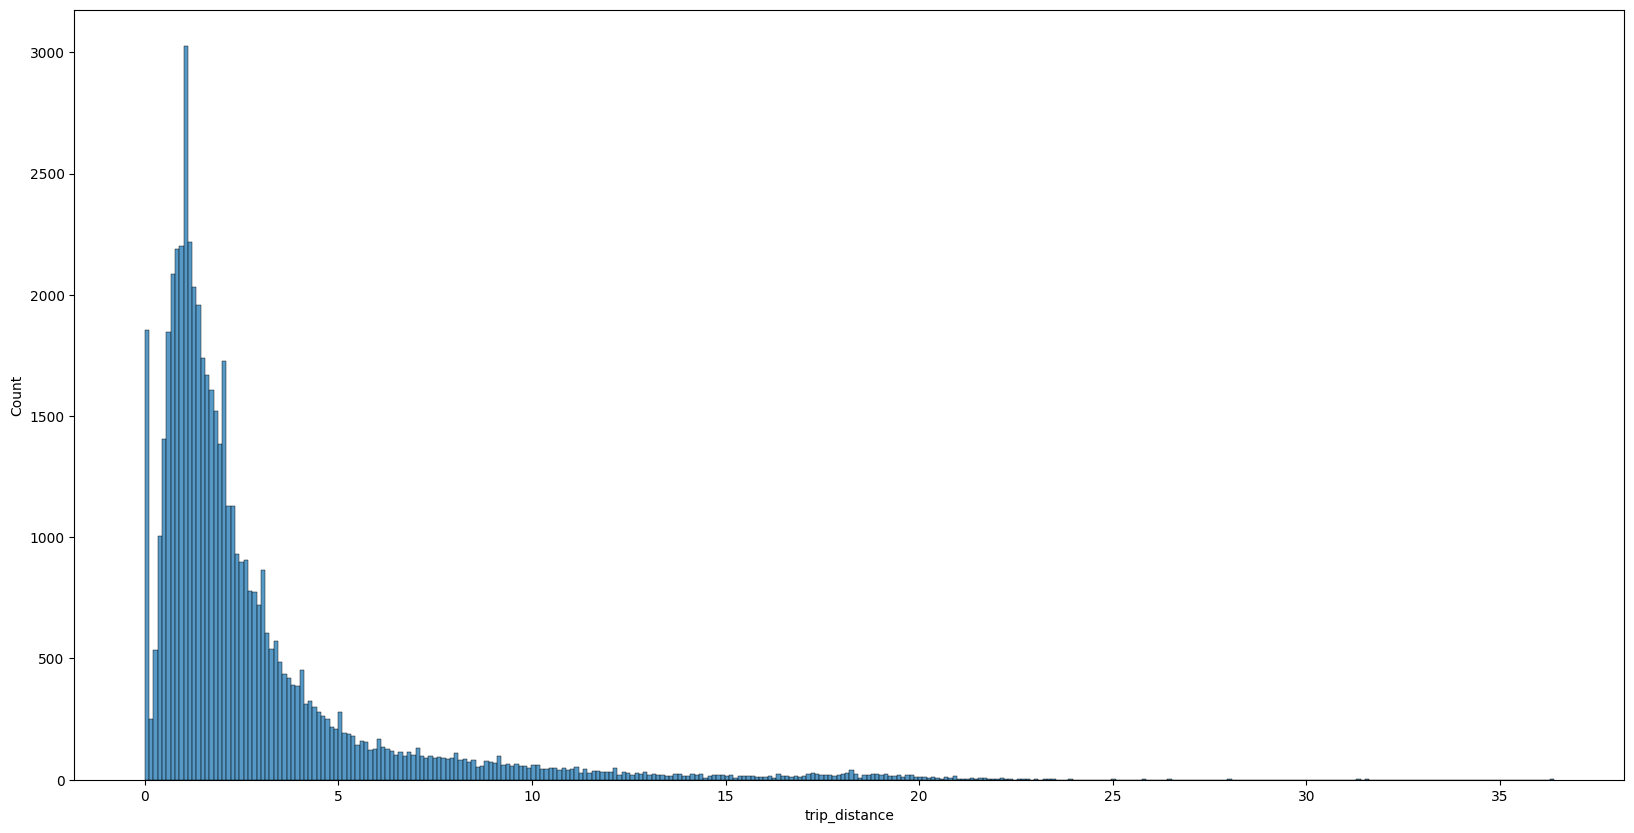

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sb.histplot(train_data.trip_distance)    ##plotting the trip distance

In [14]:
test_data=pd.read_csv('test_data_iitm.csv')

In [15]:
test_data = time_features_pickup(test_data,'tpep_pickup_datetime')
test_data = time_features_drop(test_data,'tpep_dropoff_datetime')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11420\929225662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = train_data.corr()


<AxesSubplot: >

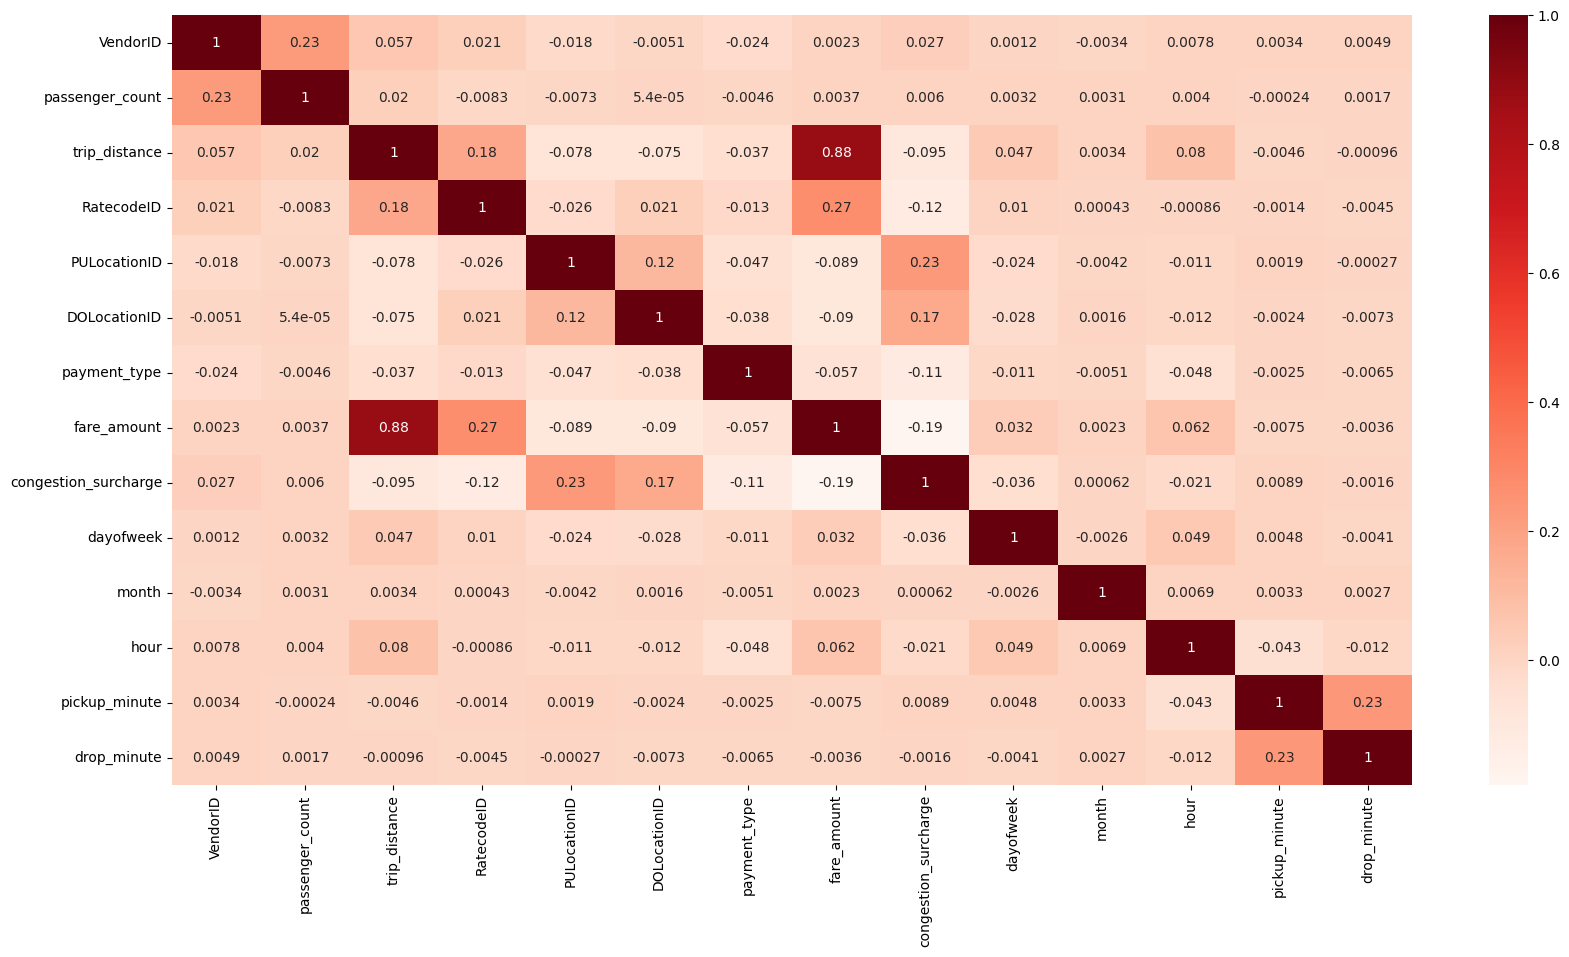

In [16]:
pearson_corr = train_data.corr()
plt.figure(figsize = (20,10))
sb.heatmap(data = pearson_corr, cmap = "Reds", annot = True)

# We see that trip_distance has the highest correlation with fare_amount with pearson coefficient of 0.88

# Comparing Different Regression Models

In [17]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse



train_dat = train_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()


test_dat = test_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()

y = train_dat["fare_amount"]
x = train_dat.drop(["fare_amount"],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("LinearRegression:")
print("Train Accuracy:",lr.score(x_train,y_train))
print("Test Accuracy:",lr.score(x_test,y_test))
print("Mean squared error:",mse(y_test, y_pred,squared=False),"\n")


from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("Lasso:")
print("Train Accuracy:",reg.score(x_train,y_train))
print("Test Accuracy:",reg.score(x_test,y_test))
print("Mean squared error:",mse(y_test, y_pred,squared=False),"\n")


from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("DecisionTreeRegressor:")
print("Train Accuracy:",clf.score(x_train,y_train))
print("Test Accuracy:",clf.score(x_test,y_test))
print("Mean squared error:",mse(y_test, y_pred,squared=False),"\n")


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression:
Train Accuracy: 0.8037634494291456
Test Accuracy: 0.8202143826221223
Mean squared error: 3.9552132938944835 

Lasso:
Train Accuracy: 0.8010996914331966
Test Accuracy: 0.8144588132298466
Mean squared error: 4.0180246889353946 

DecisionTreeRegressor:
Train Accuracy: 1.0
Test Accuracy: 0.8832126961456329
Mean squared error: 3.1877940238516684 



In [18]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor



train_dat = train_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()


y = train_dat["fare_amount"]
x = train_dat.drop(["fare_amount"],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(x_train,y_train)
y_pred = ereg.predict(x_test)
y_pred_train=ereg.predict(x_train)


print("Train Accuracy:",ereg.score(x_train,y_train))
print("Test Accuracy",ereg.score(x_test,y_test))
print("Train Root Mean squared error:",mse(y_train, y_pred_train,squared=False))
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False))

test_data1 = test_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).fillna(0)
y_pred = ereg.predict(test_data1).round(2)


test_data2=pd.read_csv('test_data_iitm.csv')
test_data2["fare_amount"] = y_pred
test_data2.to_csv("NA19B052_TanurPranav_predictions.csv",index=False)

Train Accuracy: 0.941582089967289
Test Accuracy 0.9243502139663768
Train Root Mean squared error: 2.235518862571957
Test Root Mean squared error: 2.565643367306603


# RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

train_dat = train_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()


test_dat = test_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()

y = train_dat["fare_amount"]
x = train_dat.drop(["fare_amount"],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(random_state=1)
reg2.fit(x_train,y_train)
y_pred_train=reg2.predict(x_train)
y_pred = reg2.predict(x_test)
print("RandomForestRegressor:")
print("Train Accuracy:",reg2.score(x_train,y_train))
print("Test Accuracy:",reg2.score(x_test,y_test))
print("Train Root Mean squared error:",mse(y_train, y_pred_train,squared=False))
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False),"\n")

RandomForestRegressor:
Train Accuracy: 0.9911063286532389
Test Accuracy: 0.9399565349131248
Train Root Mean squared error: 0.8722598234789816
Test Root Mean squared error: 2.285732005908229 



# GradientBoostingRegressor

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

train_dat = train_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()


test_dat = test_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()

y = train_dat["fare_amount"]
x = train_dat.drop(["fare_amount"],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor(random_state=1)
reg1.fit(x_train,y_train)
y_pred_train=reg1.predict(x_train)
y_pred = reg1.predict(x_test)
print("GradientBoostingRegressor:")
print("Train Accuracy:",reg1.score(x_train,y_train))
print("Test Accuracy:",reg1.score(x_test,y_test))
print("Train Root Mean squared error:",mse(y_train, y_pred_train,squared=False))
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False))

GradientBoostingRegressor:
Train Accuracy: 0.9294392784647522
Test Accuracy: 0.9280044046636303
Train Root Mean squared error: 2.456896363154261
Test Root Mean squared error: 2.5029109570681474


# xgboost

In [21]:
import xgboost as xgb

train_dat = train_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()


test_dat = test_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()

y = train_dat["fare_amount"]
x = train_dat.drop(["fare_amount"],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


regx=xgb.XGBRegressor(random_state=42)
regx.fit(x_train,y_train)
y_pred_train=regx.predict(x_train)
y_pred = regx.predict(x_test)
print("xgboost:")
print("Train Accuracy:",regx.score(x_train,y_train))
print("Test Accuracy:",regx.score(x_test,y_test))
print("Train Root Mean squared error:",mse(y_train, y_pred_train,squared=False))
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False))

xgboost:
Train Accuracy: 0.9884692663287519
Test Accuracy: 0.9513489218890904
Train Root Mean squared error: 0.9931933464729692
Test Root Mean squared error: 2.0574944398271486


# lightgbm

In [22]:
import lightgbm as lgb

train_dat = train_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()


test_dat = test_data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag"],axis = 1).dropna()

y = train_dat["fare_amount"]
x = train_dat.drop(["fare_amount"],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


gbm = lgb.LGBMRegressor()
gbm.fit(x_train,y_train)
y_pred_train=gbm.predict(x_train)
y_pred = gbm.predict(x_test)
print("lightgbm:")
print("Train Accuracy:",gbm.score(x_train,y_train))
print("Test Accuracy:",gbm.score(x_test,y_test))
print("Train Root Mean squared error:",mse(y_train, y_pred_train,squared=False))
print("Test Root Mean squared error:",mse(y_test, y_pred,squared=False))

lightgbm:
Train Accuracy: 0.9588043731526481
Test Accuracy: 0.9403611019675072
Train Root Mean squared error: 1.8772879335801884
Test Root Mean squared error: 2.2780184702068684
